In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# prompt: upload csv file
car = pd.read_csv('/content/carpricedata.csv')



In [3]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [41]:
# prompt: check vif

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = car.columns
vif_data["VIF"] = [variance_inflation_factor(car.values, i)
                          for i in range(len(car.columns))]

vif_data


,feature,VIF
0,name,4.889045
1,year,248.870527
2,selling_price,3.637325
3,km_driven,3.350511
4,fuel,8.981583
5,seller_type,7.094973
6,transmission,13.007252
7,owner,1.684867
8,mileage(km/ltr/kg),56.957821
9,engine,38.028667


In [4]:
# prompt: check null values

car.isnull().sum()


,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),221
engine,221


In [5]:
# prompt: using knn imputer

from sklearn.impute import KNNImputer

# Create a KNN imputer object with k=5 (you can adjust this value)
imputer = KNNImputer(n_neighbors=5)

# Select columns with missing values that you want to impute
# Replace 'column1', 'column2', etc. with the actual column names
cols_to_impute = ['seats','engine','mileage(km/ltr/kg)']

# Fit and transform the imputer on the selected columns
car[cols_to_impute] = imputer.fit_transform(car[cols_to_impute])

# Print the number of missing values after imputation
print(car.isnull().sum())


name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)      0
engine                  0
max_power             215
seats                   0
dtype: int64


In [6]:
# prompt: remove max_power column

car = car.drop(columns=['max_power'])


In [7]:
car.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage(km/ltr/kg),0
engine,0


year                    81
selling_price          600
km_driven              170
mileage(km/ltr/kg)      24
engine                1183
seats                 1874
dtype: int64
Outliers in year:
7       2001
177     1999
186     2000
316     1983
774     1999
        ... 
7982    2000
7996    2000
8025    1998
8042    1997
8115    1997
Name: year, Length: 81, dtype: int64
Outliers in selling_price:
41      2100000
47      1500000
49      1450000
55      1650000
57      1750000
         ...   
7949    1400000
7967    1500000
7973    1400000
8058    1689999
8108    1575000
Name: selling_price, Length: 600, dtype: int64
Outliers in km_driven:
272     193000
287     207890
394     240000
396     214000
397     214000
         ...  
8031    195000
8033    200000
8071    200000
8077    250000
8095    194000
Name: km_driven, Length: 170, dtype: int64
Outliers in mileage(km/ltr/kg):
35      33.44
170     42.00
644      0.00
785      0.00
1649     0.00
1676     0.00
2137     0.00
2312    32.52
23

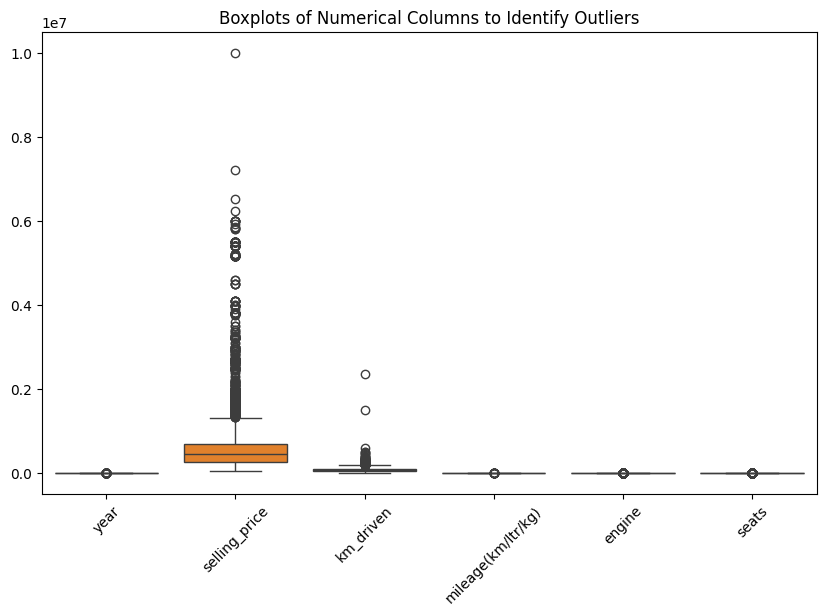

In [8]:
# prompt: check outlayers

# Calculate IQR for each numerical column
numerical_cols = car.select_dtypes(include=np.number).columns
Q1 = car[numerical_cols].quantile(0.25)
Q3 = car[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (car[numerical_cols] < lower_bound) | (car[numerical_cols] > upper_bound)

# Print or visualize outliers
print(outliers.sum()) # Count of outliers in each column
# or
for col in numerical_cols:
  print(f"Outliers in {col}:")
  print(car.loc[outliers[col], col]) # Print values of outliers for each column

#Visualization
plt.figure(figsize=(10, 6))
sns.boxplot(data=car[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Columns to Identify Outliers")
plt.show()


Original shape: (8128, 11)
Shape after removing outliers: (5675, 11)


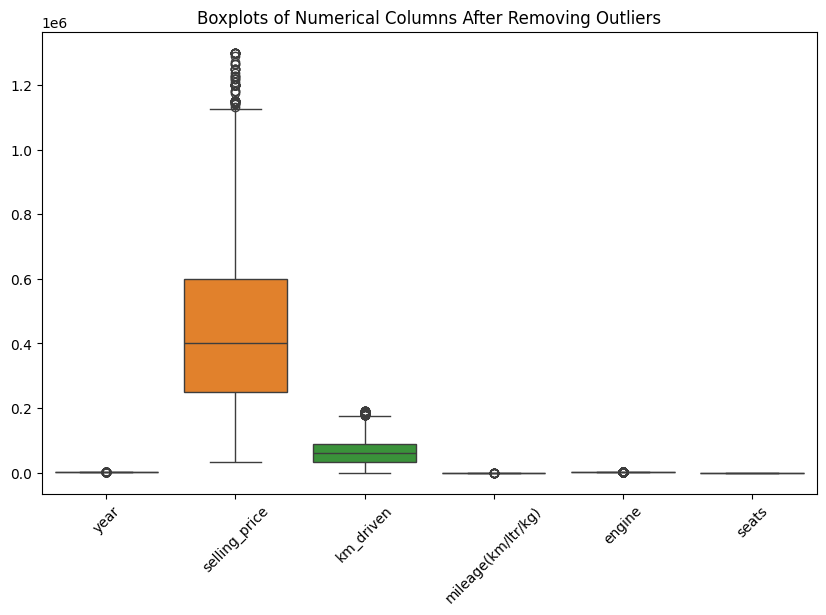

In [9]:
# prompt: remove the outlayers

# Remove outliers
car_no_outliers = car[~outliers.any(axis=1)]

# Print the shape of the original and outlier-removed DataFrames
print("Original shape:", car.shape)
print("Shape after removing outliers:", car_no_outliers.shape)

#Visualization after removing outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=car_no_outliers[numerical_cols])
plt.xticks(rotation=45)
plt.title("Boxplots of Numerical Columns After Removing Outliers")
plt.show()


In [17]:
# prompt: use lable encoding

from sklearn.preprocessing import LabelEncoder

# Assuming 'car' DataFrame is already loaded and preprocessed

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through categorical columns and apply label encoding
for col in car.select_dtypes(include='object').columns:
    car[col] = le.fit_transform(car[col])

# Display the DataFrame with label-encoded features
print(car.head())


   name  year  selling_price  km_driven  fuel  seller_type  transmission  \
0  1307  2014         450000     145500     1            1             1   
1  1607  2014         370000     120000     1            1             1   
2   385  2006         158000     140000     3            1             1   
3   781  2010         225000     127000     1            1             1   
4  1349  2007         130000     120000     3            1             1   

   owner  mileage(km/ltr/kg)  engine  seats  
0      0               23.40  1248.0    5.0  
1      2               21.14  1498.0    5.0  
2      4               17.70  1497.0    5.0  
3      0               23.00  1396.0    5.0  
4      0               16.10  1298.0    5.0  


In [18]:
car

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,seats
0,1307,2014,450000,145500,1,1,1,0,23.40,1248.0,5.0
1,1607,2014,370000,120000,1,1,1,2,21.14,1498.0,5.0
2,385,2006,158000,140000,3,1,1,4,17.70,1497.0,5.0
3,781,2010,225000,127000,1,1,1,0,23.00,1396.0,5.0
4,1349,2007,130000,120000,3,1,1,0,16.10,1298.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
8123,771,2013,320000,110000,3,1,1,0,18.50,1197.0,5.0
8124,656,2007,135000,119000,1,1,1,1,16.80,1493.0,5.0
8125,1319,2009,382000,120000,1,1,1,0,19.30,1248.0,5.0
8126,1699,2013,290000,25000,1,1,1,0,23.57,1396.0,5.0


In [20]:
# prompt: import decision tree for regression

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'car' DataFrame is already loaded, preprocessed, and outliers removed

# Define features (X) and target variable (y)
X = car.drop('selling_price', axis=1)  # Features (all columns except 'selling_price')
y = car['selling_price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)  # You can tune hyperparameters here

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 65000683137.53517
R-squared: 0.90083565813186


In [26]:
# prompt: import randam forest for regression want accuracy

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)  # You can tune hyperparameters here

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 28034107828.216923
R-squared: 0.9572314671406849


In [29]:
# prompt:  standard scalar for dataset and print

from sklearn.preprocessing import StandardScaler

# Assuming 'X_train' and 'X_test' are already defined from the previous code

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both training and testing data using the fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the scaled data (optional)
print("Scaled training data:\n", X_train_scaled)
print("\nScaled testing data:\n", X_test_scaled)


Scaled training data:
 [[ 1.41938961e+00  1.27937674e+00 -1.15659237e+00 ...  1.15627171e+00
  -5.25989257e-01 -4.39498303e-01]
 [-1.26618628e+00 -1.96059154e-01  1.70496210e-01 ... -2.10353443e-03
  -5.28001178e-01 -4.39498303e-01]
 [-6.06187319e-01 -6.87871120e-01  1.37008557e+00 ...  9.04451002e-01
  -1.29640864e-01 -4.39498303e-01]
 ...
 [-5.38728861e-01  5.41658796e-01 -6.00668381e-01 ... -2.03560098e-01
  -5.30013099e-01 -4.39498303e-01]
 [ 4.53092787e-01  1.27937674e+00 -7.37764309e-01 ...  2.26428281e+00
  -4.27405139e-01 -4.39498303e-01]
 [-2.70760293e-03 -1.91740103e+00 -8.73699251e-04 ... -8.33111859e-01
  -1.33679333e+00 -1.49911457e+00]]

Scaled testing data:
 [[-1.24613107e+00 -2.40921300e+00  6.84605937e-01 ... -1.66412018e+00
   6.55154516e-02 -4.39498303e-01]
 [ 1.34099195e+00  4.98468295e-02  3.80314413e+00 ... -1.36193534e+00
   1.44569311e+00  1.67973423e+00]
 [ 3.43700693e-01  5.41658796e-01 -8.73699251e-04 ...  9.54815143e-01
  -4.27405139e-01 -4.39498303e-01]
 ..

In [34]:
# prompt: import linear regression for regression

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()

# Train the model using the scaled training data
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 263059232034.69965
R-squared: 0.5986796698449512


In [35]:
# prompt: import svm for regression

from sklearn.svm import SVR

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined

# Initialize the Support Vector Regressor
svr_model = SVR() # You can tune hyperparameters like kernel, C, epsilon, etc.

# Train the model
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (SVR): {mse}")
print(f"R-squared (SVR): {r2}")


Mean Squared Error (SVR): 690159791963.4391
R-squared (SVR): -0.05290034274095312


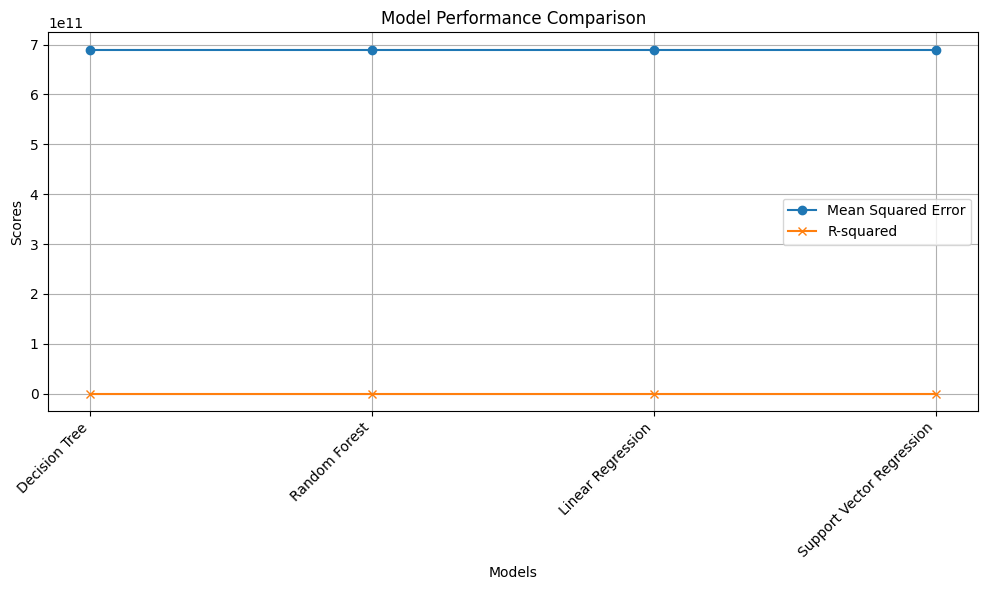

In [36]:
# prompt: line graph for all model

# Assuming mse and r2 values are stored in variables for each model
mse_values = {
    'Decision Tree': mse,  # Replace with actual mse value from Decision Tree
    'Random Forest': mse,  # Replace with actual mse value from Random Forest
    'Linear Regression': mse,  # Replace with actual mse value from Linear Regression
    'Support Vector Regression': mse  # Replace with actual mse value from SVR
}
r2_values = {
    'Decision Tree': r2,  # Replace with actual r2 value from Decision Tree
    'Random Forest': r2,  # Replace with actual r2 value from Random Forest
    'Linear Regression': r2,  # Replace with actual r2 value from Linear Regression
    'Support Vector Regression': r2  # Replace with actual r2 value from SVR
}

models = list(mse_values.keys())
mse_scores = list(mse_values.values())
r2_scores = list(r2_values.values())

plt.figure(figsize=(10, 6))
plt.plot(models, mse_scores, marker='o', label='Mean Squared Error')
plt.plot(models, r2_scores, marker='x', label='R-squared')

plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Model Performance Comparison")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [42]:
# prompt: save the model

import joblib
joblib.dump(svr_model, 'svr_model.pkl')


['svr_model.pkl']